In [1]:
from IPython.core.display import HTML
css = open('css/style-table.css').read() + open('css/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Joel/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
sns.set(style="white", context="talk")

## 1. Read yelp.csv into a DataFrame.
Bonus: Ignore the yelp.csv file, and construct this DataFrame yourself from yelp.json. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [4]:
import json
from pprint import pprint

reviews = []
for line in open('../../DAT-DC-10/data/yelp.json', 'r'):
    new_line = json.loads(line)
    for key, value in new_line['votes'].iteritems():
        new_line[key] = value
    del new_line['votes']
    reviews.append(new_line)

Based on TA feedback, doing the same without a loop

In [56]:
reviews2 = pd.DataFrame([json.loads(line) for line in open('../../DAT-DC-10/data/yelp.json','r')])
reviews2 = pd.concat((reviews2, reviews2['votes'].apply(pd.Series)),axis=1)
del reviews2['votes']
reviews2

,business_id,date,review_id,stars,text,type,user_id,cool,funny,useful
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,0,5
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,0,1
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,0,2
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,1,3
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,4,7
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,0,1
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,0,1


In [5]:
import pandas as pd
review_df = pd.DataFrame(reviews)

In [6]:

cols = ['review_id', 'business_id', 'date','stars','text','type','user_id','cool','useful','funny']
review_df = review_df[cols]
review_df.set_index('review_id', inplace=True)

In [7]:
review_df

,business_id,date,stars,text,type,user_id,cool,useful,funny
review_id,,,,,,,,,
fWKvX83p0-ka4JS3dc6E5A,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
IjZ33sJrzXqU-0X6U8NwyA,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
IESLBzqUCLdSzSqm0eCSxQ,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
G-WvGaISbqqaMHlNnByodA,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
1uJFq2r5QfJG_6ExMRCaGw,6ozycU1RpktNG2-1BroVtw,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
m2CKSsepBCoRYWxiRUsxAg,-yxfBYGB6SEqszmxJxd97A,2007-12-13,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
riFQ3vxNpP4rWLk_CSri2A,zp713qNhx8d9KCJJnrw1xA,2010-02-12,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
JL7GXJ9u4YMx7Rzs05NfiQ,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
XtnfnYmnJYi71yIuGsXIUA,wNUea3IXZWD63bbOQaOH-g,2012-08-17,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0


## 2. Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
stars = review_df[['cool','useful', 'funny', 'stars']].groupby('stars')

In [10]:
stars_sum = stars.agg('mean')

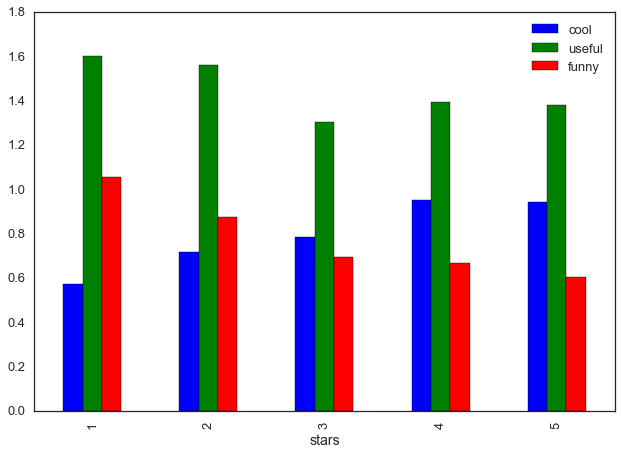

In [11]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
sns.set(style="white", context="talk")
stars_sum.plot(kind='bar')

stars
1    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
2    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
3    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
4    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
5    [[Axes(0.125,0.563043;0.336957x0.336957), Axes...
dtype: object

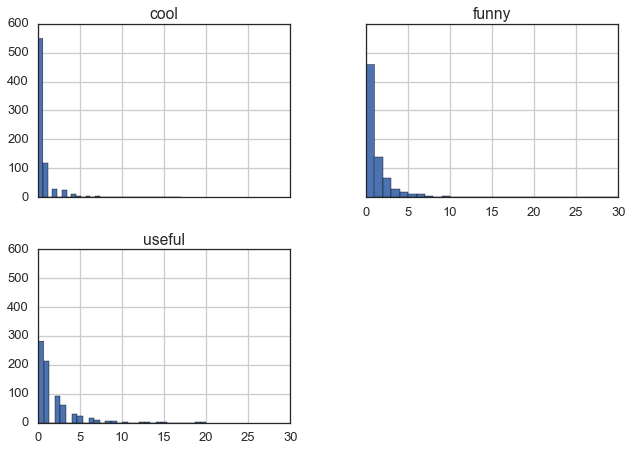

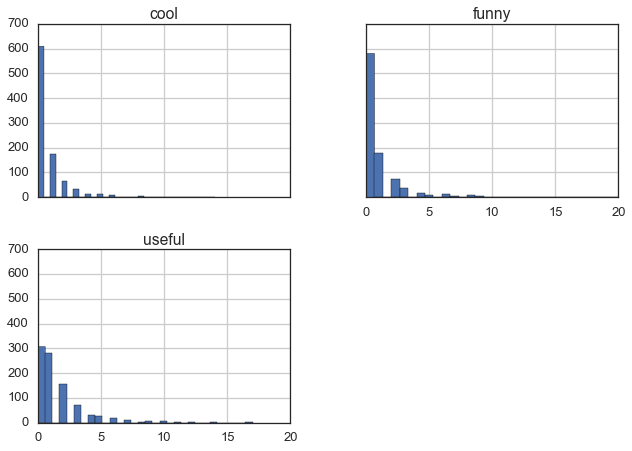

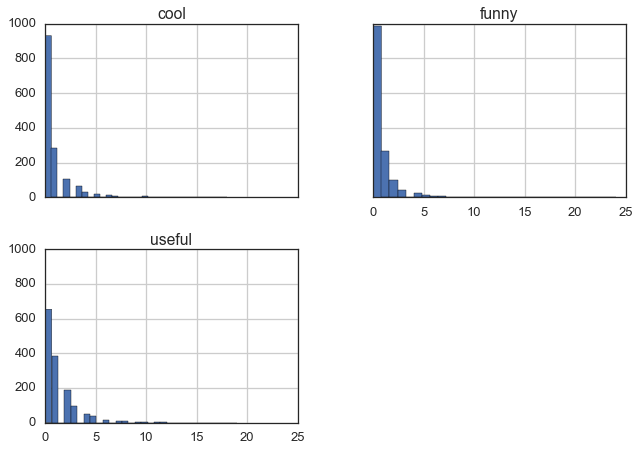

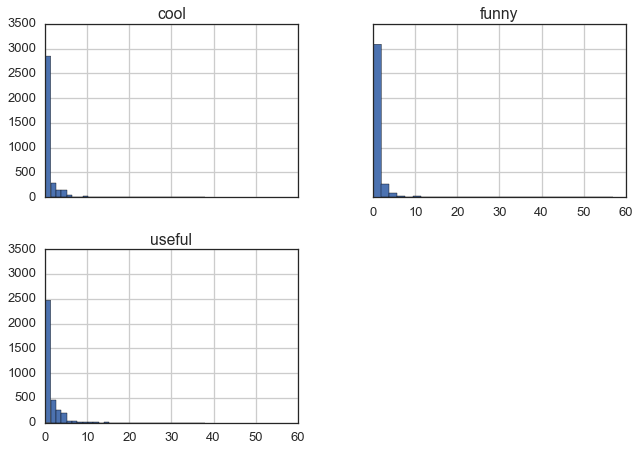

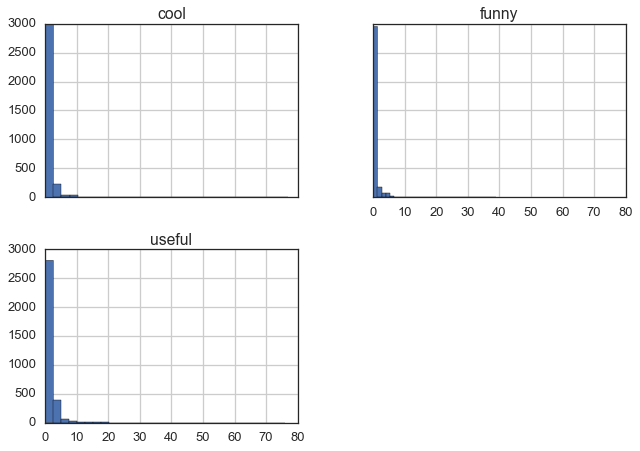

In [12]:
stars.hist(sharex=True, sharey=True, bins=30)

### 3. Define cool/useful/funny as the features, and stars as the response.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np
X = review_df[['cool','useful','funny']]
y = review_df['stars']

### 4. Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [14]:
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
linreg.coef_

array([ 0.27435947, -0.14745239, -0.13567449])

In [16]:
linreg.intercept_

3.8398947927830798

Yes, the higher the rating, the more likely that someone finds the review to be cool. The most useful reviews help people avoid poor businesses and it is easier to funny when insulting a place of business than it is when complimenting one. Exploring the Yelp website, it seems that in a very limited sample, that for high-star restaurants, there are a lot of cool and useful ratings (and a few funny). There are just many fewer ratings for the low-star ratings, but those few tend to be much heavier on useful and funny than they are on cool. The absolute numbers, however, are challenging. There are many ratings with no useful, funny, or cool votes. There are also a few very popular posts with many votes for each. I think this will be quite challenging to fit a line to.

### 5. Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_predict = linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

1.1837166840676636

The root square of the prediction is a little over one star off based on the useful, cool, and funny features.

### 6. Try removing some of the features and see if the RMSE improves.

In [19]:
# Let's steal the function from class 
def train_test_rmse(feature_cols, input_frame):
    X = input_frame[feature_cols].astype('float')
    y = input_frame['stars']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    # instantiate and fit
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_predict = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_predict))

In [20]:
#test all combinations of the given columns
import itertools
all_combinations = [(list(cols), train_test_rmse(list(cols), review_df))
                    for num_col in range(1,4)
                    for cols in itertools.combinations(['cool','useful','funny'], num_col)]


In [21]:
def all_combos(input_cols, df):
    return [(list(cols), train_test_rmse(list(cols), df)) 
            for num_col in range(1,len(input_cols)+1)
            for cols in itertools.combinations(input_cols, num_col)]

In [22]:
all_combos(['cool','useful','funny'], review_df)

[(['cool'], 1.2098613577151192),
 (['useful'], 1.2114812467942395),
 (['funny'], 1.2097202243841205),
 (['cool', 'useful'], 1.1963421940319081),
 (['cool', 'funny'], 1.1928224707373645),
 (['useful', 'funny'], 1.2090184428968418),
 (['cool', 'useful', 'funny'], 1.1837166840676636)]

In [23]:
# Baseline
np.sqrt(metrics.mean_squared_error([np.mean(y_test)]*len(y_test), y_test))

1.2116946810149825

### 7. Bonus: Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

Some interesting features could include total number of reviews for the business. Some key words in the text include could include something from sentiment analysis associated with certain keywords.

In [24]:
review_df[review_df.text.str.contains('love')]['stars'].value_counts()

5    860
4    732
3    229
2     93
1     61
Name: stars, dtype: int64

In [25]:
#review_df.head()

In [26]:
tot_revs = pd.DataFrame(review_df.groupby('business_id').count()['date']).rename(columns={'date':'total_reviews'})

In [27]:
with_avg_reviews = review_df.merge(tot_revs,left_on='business_id', right_index=True)

In [28]:
with_avg_reviews['love'] = review_df.text.str.contains('love')

In [29]:
with_avg_reviews['disgusting'] = review_df.text.str.contains('disgusting')

In [30]:
sorted(all_combos(['cool','useful','funny','total_reviews','love','disgusting'], with_avg_reviews), 
      key=(lambda (x,y): y))

[(['cool', 'useful', 'funny', 'total_reviews', 'love', 'disgusting'],
  1.1770692782819663),
 (['cool', 'funny', 'total_reviews', 'love', 'disgusting'],
  1.1790856936140768),
 (['cool', 'useful', 'funny', 'love', 'disgusting'], 1.1798066951065944),
 (['cool', 'funny', 'love', 'disgusting'], 1.1815076561121587),
 (['cool', 'useful', 'funny', 'total_reviews', 'love'], 1.1827578674062966),
 (['cool', 'funny', 'total_reviews', 'love'], 1.1850445190070447),
 (['cool', 'useful', 'funny', 'love'], 1.1856264530836),
 (['cool', 'funny', 'love'], 1.1875961329295741),
 (['cool', 'useful', 'total_reviews', 'love', 'disgusting'],
  1.1912524640841757),
 (['cool', 'useful', 'funny', 'total_reviews', 'disgusting'],
  1.191259014894394),
 (['useful', 'funny', 'total_reviews', 'love', 'disgusting'],
  1.1920257287544285),
 (['cool', 'funny', 'total_reviews', 'disgusting'], 1.1924633497066246),
 (['funny', 'total_reviews', 'love', 'disgusting'], 1.1925844379715427),
 (['cool', 'useful', 'love', 'disgus

Not much improvement

### 8. Bonus: Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

Good, already did this

In [31]:
# Baseline
np.sqrt(metrics.mean_squared_error([np.mean(y_test)]*len(y_test), y_test))

1.2116946810149825

### 9. Bonus: Instead of treating this as a regression problem, treat it as a classification problem and see what testing accuracy you can achieve with KNN.

Oops, treated this still as regression-- see problem 10 for using both linear "regression" and knn for classification.

In [35]:
# Add a function and some kwargs?
def train_test_rmse_mod(feature_cols, input_frame, algo, **kwargs):
    X = input_frame[feature_cols].astype('float')
    y = input_frame['stars']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    # instantiate and fit
    model = algo(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_predict))

In [36]:
from sklearn.neighbors import KNeighborsClassifier
sorted([(train_test_rmse_mod(['cool','useful','funny'], review_df, KNeighborsClassifier, n_neighbors=nbrs), nbrs)
        for nbrs in range(1,8001,80)])

[(1.2304470732217621, 3601),
 (1.2304470732217621, 3681),
 (1.2304470732217621, 3761),
 (1.2304470732217621, 3841),
 (1.2304470732217621, 3921),
 (1.2304470732217621, 4001),
 (1.2304470732217621, 4081),
 (1.2304470732217621, 4161),
 (1.2304470732217621, 4241),
 (1.2304470732217621, 4321),
 (1.2304470732217621, 4401),
 (1.2304470732217621, 4481),
 (1.2304470732217621, 4561),
 (1.2304470732217621, 4641),
 (1.2304470732217621, 4721),
 (1.2304470732217621, 4801),
 (1.2304470732217621, 4881),
 (1.2304470732217621, 4961),
 (1.2304470732217621, 5041),
 (1.2304470732217621, 5121),
 (1.2304470732217621, 5201),
 (1.2304470732217621, 5281),
 (1.2304470732217621, 5361),
 (1.2304470732217621, 5441),
 (1.2304470732217621, 5521),
 (1.2304470732217621, 5601),
 (1.2304470732217621, 5681),
 (1.2304470732217621, 5761),
 (1.2304470732217621, 5841),
 (1.2304470732217621, 5921),
 (1.2304470732217621, 6001),
 (1.2304470732217621, 6081),
 (1.2304470732217621, 6161),
 (1.2304470732217621, 6241),
 (1.2304470732

In [37]:
train_test_rmse_mod(['cool','useful', 'funny'], review_df, LinearRegression)

1.1837166840676636

### 10. Bonus: Figure out how to use linear regression for classification, and compare its classification accuracy with KNN's accuracy.

In [38]:
# Add error determination
def train_test_rmse_mod2(feature_cols, input_frame, error_measure, algo, **kwargs):
    X = input_frame[feature_cols].astype('float')
    y = input_frame['stars']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    # instantiate and fit
    model = algo(**kwargs)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    return error_measure(y_test, y_predict)

In [39]:
train_test_rmse_mod2(['cool','useful', 'funny'], review_df, 
                     lambda x, y: metrics.accuracy_score(x, [round(val) for val in y]), LinearRegression)

0.34449999999999997

In [42]:
train_test_rmse_mod2(['cool','useful', 'funny'], review_df, (lambda x,y: np.sqrt(metrics.mean_squared_error(x,y))), LinearRegression)

1.1837166840676636

In [43]:
train_test_rmse_mod2(['cool','useful','funny'], review_df, 
                     lambda x,y: np.sqrt(metrics.mean_squared_error(x,y)), KNeighborsClassifier, n_neighbors=5)

1.45

In [44]:
train_test_rmse_mod2(['cool','useful','funny'], review_df, 
                     metrics.accuracy_score, KNeighborsClassifier, n_neighbors=3600)

0.35299999999999998

Comparable for even what should be a pretty good value of n_neighbors